> **WARNING**
>
> Don't use "Run All". Run the cells one after another manually.

In [1]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 30716, done.
remote: Counting objects: 100% (1162/1162), done.
remote: Compressing objects: 100% (726/726), done.
remote: Total 30716 (delta 754), reused 745 (delta 432), pack-reused 29554
Receiving objects: 100% (30716/30716), 15.72 MiB | 18.52 MiB/s, done.
Resolving deltas: 100% (22087/22087), done.


In [2]:
%cd /content/ultralytics

/content/ultralytics


In [3]:
!git reset --hard abd391b63338b79cebee808b6679498dcc94956f

HEAD is now at abd391b6 `ultralytics 8.2.55` adaptive `tflite_support` logic (#14385)


In [4]:
# Download patch
!wget https://gist.githubusercontent.com/Y-T-G/8f4fc0b78a0a559a06fe84ae4f359e6e/raw/05a9086de3825e15ebef3830229273982c3ad9ec/add_head.patch

--2024-07-23 11:46:35--  https://gist.githubusercontent.com/Y-T-G/8f4fc0b78a0a559a06fe84ae4f359e6e/raw/05a9086de3825e15ebef3830229273982c3ad9ec/add_head.patch
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11258 (11K) [text/plain]
Saving to: ‘add_head.patch’

add_head.patch      100%[===================>]  10.99K  --.-KB/s    in 0s      

2024-07-23 11:46:35 (85.8 MB/s) - ‘add_head.patch’ saved [11258/11258]



In [5]:
!git apply add_head.patch

In [6]:
!pip install -e .

Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-many

In [8]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


In [9]:

from roboflow import Roboflow
rf = Roboflow(api_key="Jaz0AeB3IbSAHu3TDEfl")
project = rf.workspace("plant-oqh12").project("maize_leaf")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.55, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to maize_leaf-1 in yolov8:: 100%|██████████| 10100/10100 [00:02<00:00, 3436.14it/s]


In [11]:
from roboflow import Roboflow
rf = Roboflow(api_key="hga92FJ7iHcjjXThQJ5I")
project = rf.workspace("project-n3wam").project("project-ttd5y")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.55, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Project-1 in yolov8:: 100%|██████████| 2012/2012 [00:00<00:00, 7590.46it/s]


In [12]:
!mkdir -p /content/datasets/Project-1
!mv Project-1/** /content/datasets/Project-1
!mv /content/datasets/Project-1/data.yaml /content/datasets

# Train a model with frozen COCO backbone

In [13]:
# Reset runtime
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

# Wait for restart and then continue

{'status': 'ok', 'restart': True}

> **WARNING**
>
> Wait for the Colab kernel to crash and restart after running the above cell, before continuing.

In [1]:
%cd /content/ultralytics

/content/ultralytics


In [2]:
from ultralytics import YOLO
import torch
import copy

In [3]:
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

100%|██████████| 6.25M/6.25M [00:00<00:00, 102MB/s]


In [4]:
# Keep a copy of old state dict for sanity check
old_dict = copy.deepcopy(model.state_dict())

In [5]:
# We should freeze all but the last layer
model.state_dict().keys()

odict_keys(['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.0.bn.num_batches_tracked', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.1.bn.num_batches_tracked', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv1.bn.num_batches_tracked', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.cv2.bn.num_batches_tracked', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.mod

In [6]:
# Add a callback to put the frozen layers in eval mode to prevent BN values
# from changing.
def put_in_eval_mode(trainer, n_layers=22):
  for i, (name, module) in enumerate(trainer.model.named_modules()):
    if name.endswith("bn") and int(name.split('.')[1]) < n_layers:
      module.eval()
      module.track_running_stats = False
      # print(name, " put in eval mode.")

In [7]:
model.add_callback("on_train_epoch_start", put_in_eval_mode)
model.add_callback("on_pretrain_routine_start", put_in_eval_mode)

In [8]:
# Train the model. Freeze the first 22 layers [0-21].
results = model.train(data='/content/datasets/data.yaml', freeze=22, epochs=50, imgsz=640)

New https://pypi.org/project/ultralytics/8.2.63 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=22, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

100%|██████████| 755k/755k [00:00<00:00, 11.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/datasets/Project-1/train/labels... 700 images, 0 backgrounds, 0 corrupt: 100%|██████████| 700/700 [00:00<00:00, 1757.28it/s]


train: New cache created: /content/datasets/Project-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/Project-1/valid/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 1520.73it/s]

val: New cache created: /content/datasets/Project-1/valid/labels.cache


Plotting labels to /content/ultralytics/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/ultralytics/runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.18G     0.9353      2.671      1.219         27        640: 100%|██████████| 44/44 [00:19<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        200        218      0.804     0.0985       0.31      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.851G     0.8828      2.069      1.179         22        640: 100%|██████████| 44/44 [00:18<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        200        218      0.509      0.508      0.468      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.881G     0.8618      1.862      1.165         29        640: 100%|██████████| 44/44 [00:15<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]


                   all        200        218      0.541      0.741      0.657      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.881G     0.8698      1.729      1.155         27        640: 100%|██████████| 44/44 [00:14<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]


                   all        200        218      0.599      0.706      0.721      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.881G     0.8395      1.598      1.151         23        640: 100%|██████████| 44/44 [00:15<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        200        218      0.677      0.687      0.765       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.881G     0.8196      1.494      1.149         17        640: 100%|██████████| 44/44 [00:15<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        200        218      0.669      0.755      0.755      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.881G     0.8065      1.398      1.141         25        640: 100%|██████████| 44/44 [00:15<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]

                   all        200        218      0.662      0.789      0.809      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.881G     0.7639      1.338      1.113         28        640: 100%|██████████| 44/44 [00:15<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


                   all        200        218       0.66      0.756      0.771      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.881G     0.7956       1.32       1.13         27        640: 100%|██████████| 44/44 [00:14<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]


                   all        200        218      0.668      0.811      0.822      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.881G     0.7701      1.255      1.118         23        640: 100%|██████████| 44/44 [00:15<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]

                   all        200        218      0.702      0.805      0.848      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.881G     0.7605      1.206      1.103         27        640: 100%|██████████| 44/44 [00:15<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]

                   all        200        218      0.767      0.788      0.865      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.881G     0.7498      1.187      1.095         22        640: 100%|██████████| 44/44 [00:14<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]


                   all        200        218       0.72      0.825      0.854      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.879G     0.7251      1.131      1.076         31        640: 100%|██████████| 44/44 [00:15<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        200        218      0.799      0.767      0.849      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.879G     0.7295      1.108      1.094         24        640: 100%|██████████| 44/44 [00:17<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


                   all        200        218      0.766      0.815      0.861      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.879G     0.7345      1.121      1.084         28        640: 100%|██████████| 44/44 [00:15<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]

                   all        200        218      0.755      0.811      0.871      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.879G     0.7334      1.098      1.079         23        640: 100%|██████████| 44/44 [00:15<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]

                   all        200        218      0.821      0.765      0.887      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.904G     0.7415      1.091      1.103         25        640: 100%|██████████| 44/44 [00:15<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]


                   all        200        218      0.746      0.805      0.862      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.879G     0.7174      1.059      1.076         28        640: 100%|██████████| 44/44 [00:14<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        200        218      0.744      0.814       0.84      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.879G     0.6848      1.021      1.059         26        640: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


                   all        200        218       0.73      0.849      0.859      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.898G     0.6947      1.037      1.065         29        640: 100%|██████████| 44/44 [00:13<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        200        218      0.773      0.807      0.867      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.879G     0.7011      1.011      1.061         22        640: 100%|██████████| 44/44 [00:12<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        200        218      0.829      0.738      0.871      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.879G     0.7142       1.01      1.064         33        640: 100%|██████████| 44/44 [00:12<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        200        218      0.822      0.753      0.863      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.879G     0.6799     0.9821      1.074         26        640: 100%|██████████| 44/44 [00:13<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        200        218      0.773      0.801      0.877      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.879G     0.6798     0.9798       1.06         25        640: 100%|██████████| 44/44 [00:13<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        200        218      0.779      0.796      0.873      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.879G     0.6857      0.979      1.055         24        640: 100%|██████████| 44/44 [00:14<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        200        218      0.836      0.809      0.896      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.879G     0.6716     0.9515      1.054         25        640: 100%|██████████| 44/44 [00:15<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        200        218      0.839      0.786      0.893      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.879G     0.6823     0.9436      1.059         23        640: 100%|██████████| 44/44 [00:15<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]

                   all        200        218      0.848      0.762      0.885       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.879G     0.6733     0.9404      1.051         24        640: 100%|██████████| 44/44 [00:14<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        200        218        0.8      0.826      0.888      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.879G      0.668     0.9288      1.052         36        640: 100%|██████████| 44/44 [00:14<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        200        218      0.796      0.793      0.873      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.879G     0.6781     0.9307      1.052         27        640: 100%|██████████| 44/44 [00:14<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]


                   all        200        218      0.811      0.838      0.906      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.879G     0.6574     0.9284      1.056         26        640: 100%|██████████| 44/44 [00:14<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        200        218      0.823      0.789      0.882      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.879G     0.6445     0.9206      1.046         25        640: 100%|██████████| 44/44 [00:13<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        200        218      0.814      0.825      0.899      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.879G     0.6415     0.9194      1.053         24        640: 100%|██████████| 44/44 [00:14<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        200        218      0.786      0.857      0.904      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.879G     0.6864     0.9516      1.071         24        640: 100%|██████████| 44/44 [00:13<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        200        218      0.828       0.84      0.903      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.877G     0.6379     0.8847      1.037         23        640: 100%|██████████| 44/44 [00:14<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        200        218      0.837      0.851      0.914       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.879G     0.6218     0.8793      1.036         37        640: 100%|██████████| 44/44 [00:13<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        200        218      0.782      0.853      0.902       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.927G     0.6361     0.8858      1.033         25        640: 100%|██████████| 44/44 [00:18<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        200        218      0.839      0.837      0.903      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.879G     0.6427     0.8792      1.032         26        640: 100%|██████████| 44/44 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        200        218      0.814      0.801      0.906      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.879G     0.6443     0.8788      1.045         26        640: 100%|██████████| 44/44 [00:13<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        200        218      0.841      0.803      0.894      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.879G     0.6377     0.8798      1.047         41        640: 100%|██████████| 44/44 [00:12<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        200        218      0.862      0.844      0.921      0.705


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.02G     0.6154     0.7608      1.055         11        640: 100%|██████████| 44/44 [00:14<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


                   all        200        218      0.834      0.831       0.91      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.881G      0.605     0.7582      1.066         12        640: 100%|██████████| 44/44 [00:11<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        200        218      0.852      0.853      0.921      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.881G      0.611     0.7232      1.057         12        640: 100%|██████████| 44/44 [00:10<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        200        218      0.847      0.848      0.917      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.881G     0.6127     0.7202      1.075         12        640: 100%|██████████| 44/44 [00:11<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]

                   all        200        218      0.828      0.854       0.92       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.881G      0.587     0.7191       1.05         12        640: 100%|██████████| 44/44 [00:12<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]

                   all        200        218      0.806      0.893      0.922      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.881G     0.5812     0.6869      1.047         12        640: 100%|██████████| 44/44 [00:14<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]

                   all        200        218      0.792      0.896      0.925      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.881G     0.5929     0.7049      1.069         12        640: 100%|██████████| 44/44 [00:14<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all        200        218      0.826      0.844      0.922       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.881G     0.5945      0.683      1.058         12        640: 100%|██████████| 44/44 [00:15<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]

                   all        200        218      0.842      0.848      0.929      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.881G     0.5713     0.6689      1.039         12        640: 100%|██████████| 44/44 [00:17<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]


                   all        200        218      0.779        0.9      0.927      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.881G      0.582     0.6685      1.054         12        640: 100%|██████████| 44/44 [00:12<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        200        218      0.822      0.869      0.929       0.75



50 epochs completed in 0.262 hours.
Optimizer stripped from /content/ultralytics/runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from /content/ultralytics/runs/detect/train/weights/best.pt, 6.3MB

Validating /content/ultralytics/runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]


                   all        200        218       0.78        0.9      0.927      0.754
       d_license_plate        107        107      0.799      0.879      0.908      0.729
      pl_license_plate         93        111      0.762      0.921      0.947      0.778
Speed: 0.3ms preprocess, 3.2ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to /content/ultralytics/runs/detect/train


In [10]:
def compare_dicts(state_dict1, state_dict2):
    # Compare the keys
    keys1 = set(state_dict1.keys())
    keys2 = set(state_dict2.keys())

    if keys1 != keys2:
        print("Models have different parameter names.")
        return False

    # Compare the values (weights)
    for key in keys1:
        if not torch.equal(state_dict1[key], state_dict2[key]):
            print(f"Weights for parameter '{key}' are different.")
            if "bn" in key and "22" not in key:
              state_dict1[key] = state_dict2[key]

In [11]:
# Compare the dicts. Changes should only be in layer 21 and above
compare_dicts(old_dict, model.state_dict())

Weights for parameter 'model.model.22.cv3.1.0.bn.weight' are different.
Weights for parameter 'model.model.22.cv3.1.1.bn.running_var' are different.
Weights for parameter 'model.model.22.cv3.0.2.weight' are different.
Weights for parameter 'model.model.22.cv3.0.0.bn.running_mean' are different.
Weights for parameter 'model.model.22.cv2.1.2.bias' are different.
Weights for parameter 'model.model.22.cv3.0.1.bn.weight' are different.
Weights for parameter 'model.model.22.cv2.2.0.bn.running_var' are different.
Weights for parameter 'model.model.22.cv2.2.0.conv.weight' are different.
Weights for parameter 'model.model.22.cv2.1.1.bn.running_var' are different.
Weights for parameter 'model.model.22.cv2.2.1.bn.running_var' are different.
Weights for parameter 'model.model.22.cv2.2.2.weight' are different.
Weights for parameter 'model.model.22.cv3.2.1.bn.running_var' are different.
Weights for parameter 'model.model.22.cv3.0.2.bias' are different.
Weights for parameter 'model.model.22.cv2.1.0.c

In [12]:
new_state_dict = dict()

In [13]:
#  Increment the head number by 1 in the state_dict
for k, v in model.state_dict().items():
  if k.startswith("model.model.22"):
    new_state_dict[k.replace("model.22", "model.23")] = v
  # else:
  #   new_state_dict[k] = v

In [14]:
# Save the current state_dict
torch.save(new_state_dict, "yolov8n_lp.pth")

# Create new architecture with extra head and load custom weights

In [15]:
from ultralytics import YOLO
import torch

In [19]:
# Edit this to the number of new classes you added
import locale
locale.getpreferredencoding = lambda: "UTF-8"
added_classes = 2 # Added 2 new classes.
nc = 80 + added_classes # Total no. of classes

# Update yaml with the number of added_classes
!sed -i "52s/.*/  - \[\[15, 18, 21\], 1, Detect, \[{added_classes}\]\]/g" ultralytics/cfg/models/v8/yolov8n-2xhead.yaml
!sed -i "5s/.*/nc: {nc}/g" ultralytics/cfg/models/v8/yolov8n-2xhead.yaml

In [20]:
model_2 = YOLO('ultralytics/cfg/models/v8/yolov8n-2xhead.yaml', task="detect").load('yolov8n.pt')

Transferred 355/440 items from pretrained weights


In [21]:
model_2.state_dict().keys()

odict_keys(['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.0.bn.num_batches_tracked', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.1.bn.num_batches_tracked', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv1.bn.num_batches_tracked', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.cv2.bn.num_batches_tracked', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.mod

In [22]:
state_dict = torch.load("yolov8n_lp.pth")

In [23]:
state_dict.keys()

dict_keys(['model.model.23.cv2.0.0.conv.weight', 'model.model.23.cv2.0.0.bn.weight', 'model.model.23.cv2.0.0.bn.bias', 'model.model.23.cv2.0.0.bn.running_mean', 'model.model.23.cv2.0.0.bn.running_var', 'model.model.23.cv2.0.0.bn.num_batches_tracked', 'model.model.23.cv2.0.1.conv.weight', 'model.model.23.cv2.0.1.bn.weight', 'model.model.23.cv2.0.1.bn.bias', 'model.model.23.cv2.0.1.bn.running_mean', 'model.model.23.cv2.0.1.bn.running_var', 'model.model.23.cv2.0.1.bn.num_batches_tracked', 'model.model.23.cv2.0.2.weight', 'model.model.23.cv2.0.2.bias', 'model.model.23.cv2.1.0.conv.weight', 'model.model.23.cv2.1.0.bn.weight', 'model.model.23.cv2.1.0.bn.bias', 'model.model.23.cv2.1.0.bn.running_mean', 'model.model.23.cv2.1.0.bn.running_var', 'model.model.23.cv2.1.0.bn.num_batches_tracked', 'model.model.23.cv2.1.1.conv.weight', 'model.model.23.cv2.1.1.bn.weight', 'model.model.23.cv2.1.1.bn.bias', 'model.model.23.cv2.1.1.bn.running_mean', 'model.model.23.cv2.1.1.bn.running_var', 'model.model.2

In [24]:
# Load state_dict of the custom trained model head. Layer 23.
model_2.load_state_dict(state_dict, strict=False)

_IncompatibleKeys(missing_keys=['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.model.2.m.0.cv2.conv.weight', 'model.model.2.m.0.cv2.bn.weight', 'model.model.2.m.0.cv2.bn.bias', 'model.model.2.m.0.cv2.bn.running_mean', 'model.model

In [26]:
# Output of COCO model
model_coco = YOLO("yolov8n.pt")

# For consistency
model_coco.model.names = {k:k for k in model_coco.names.keys()}

result_coco = model_coco.predict("/content/datasets/Project-1/train/images/d_license_plate_101_jpg.rf.1c16a148b6a9360da0dc5181473aed25.jpg")[0]


image 1/1 /content/datasets/Project-1/train/images/d_license_plate_101_jpg.rf.1c16a148b6a9360da0dc5181473aed25.jpg: 640x640 1 2, 1 3, 1 7, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


In [28]:
# Output of custom LP model
model_lp = YOLO("/content/ultralytics/runs/detect/train/weights/best.pt")

# For plotting consistency, change all class names to class numbers
model_lp.model.names = {k:k for k in model_lp.names.keys()}

result_lp = model_lp.predict("/content/datasets/Project-1/train/images/d_license_plate_101_jpg.rf.1c16a148b6a9360da0dc5181473aed25.jpg")[0]


image 1/1 /content/datasets/Project-1/train/images/d_license_plate_101_jpg.rf.1c16a148b6a9360da0dc5181473aed25.jpg: 640x640 1 0, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


In [29]:
# Output of the new model
result_merged = model_2.predict("/content/datasets/Project-1/train/images/d_license_plate_101_jpg.rf.1c16a148b6a9360da0dc5181473aed25.jpg")[0]


image 1/1 /content/datasets/Project-1/train/images/d_license_plate_101_jpg.rf.1c16a148b6a9360da0dc5181473aed25.jpg: 640x640 1 2, 1 3, 1 7, 1 80, 19.7ms
Speed: 7.8ms preprocess, 19.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


In [30]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
def show_output(images):
    image = np.vstack(images)
    fig = plt.figure()
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    fig.set_size_inches((5,15))
    ax.imshow(image[...,::-1])

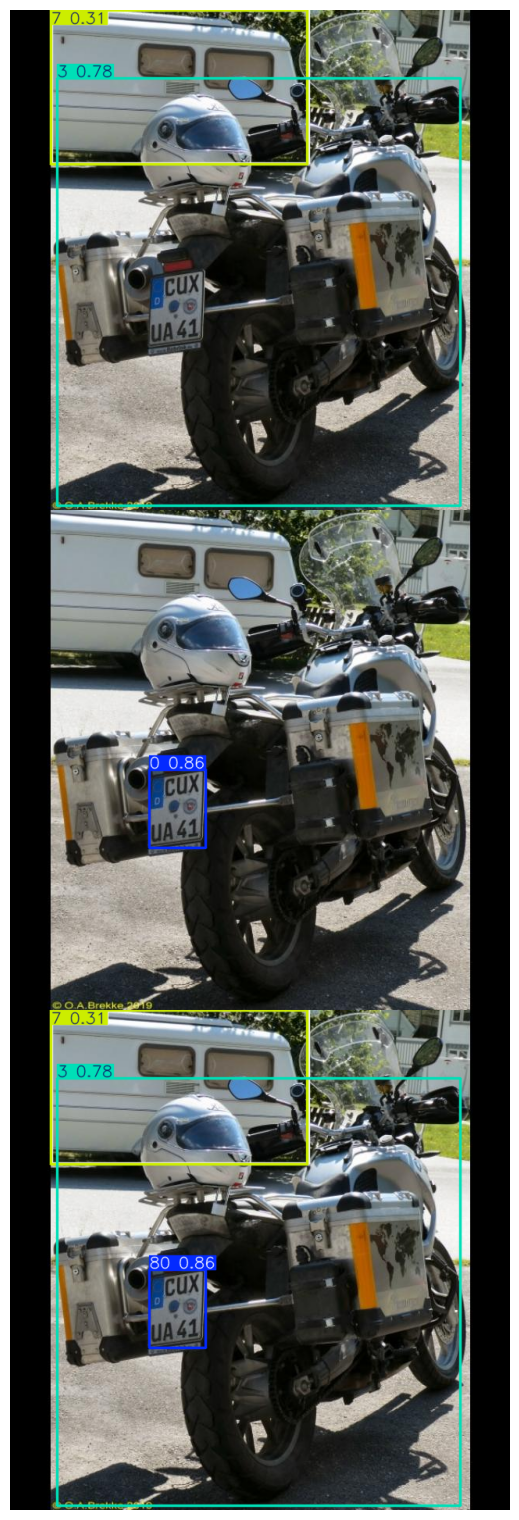

In [32]:
show_output([result_coco.plot(), result_lp.plot(), result_merged.plot()])

In [33]:
# Save .pt of merged model
model_2.ckpt = {"model": model_2.model}
model_2.save("merged.pt")

# Load saved merged model. No additional steps required.
model_2 = YOLO("merged.pt")

In [34]:
!zip /content/ultralytics


zip error: Nothing to do! (/content/ultralytics.zip)


In [35]:
# prompt: write a program to zip a directory

import shutil
shutil.make_archive('/content/ultralytics', 'zip', '/content/ultralytics')


'/content/ultralytics.zip'

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
!cp /content/ultralytics.zip  /content/drive/MyDrive/BOOKS